## Bayesian MCMC algorithm for inference of $N_e$ parameters in MSC model

Note, we have not yet implemented joint inference of divergence time, or $r$, into this method. It should be straight forward, but would extend the run time. For now it takes fixed values for these parameters.

In [1]:
import toyplot
import ipcoal
import numpy as np

### Run MCMC algorithm

The Python program `ms-smc-mcmc` below is a command-line entrypoint to the file `ipcoal/smc/likelihood/mcmc.py`.

In [ ]:
%%bash

ms-smc-mcmc \
    --log-level INFO \
    --mcmc-nsamples 10000 \
    --mcmc-print-interval 50 \
    --mcmc-sample-interval 5 \
    --mcmc-burnin 200 \
    --recomb 2e-9 \
    --name combined-234-100loci-1e5len-final \
    --data-type combined \
    --nloci 50 \
    --nsites 1e5 \
    --threads 20 \
    --seed 666 \
    --prior u 10 1e7 \
    --params 200_000 300_000 400_000 \
    --log-file

### Load results

In [201]:
arr = np.load("../../ipcoal/ipcoal/smc/likelihood/combined-50loci-1e5sites.npy")
arr.shape

(10000, 4)

### Plot results

In [230]:
canvas = toyplot.Canvas(width=450, height=225)
axes = canvas.cartesian()
axes.x.domain.show = True
axes.x.ticks.locator = toyplot.locator.Extended(count=5, only_inside=True)
axes.x.ticks.show = True
axes.x.ticks.near = 7.5
axes.x.ticks.far = 0
axes.x.ticks.labels.offset = 12.5
axes.x.ticks.style['stroke-width'] = 1.5
axes.x.spine.style['stroke-width'] = 1.5

for ax in (axes.x, axes.y):
    ax.domain.show = False
    ax.ticks.show = True
    ax.ticks.near = 7.5
    ax.ticks.far = 0
    ax.ticks.labels.offset = 12
    ax.ticks.labels.style["font-size"] = 16
    ax.label.offset = 35
    ax.label.style["font-size"] = 16
    ax.ticks.style["stroke-width"] = 3
    ax.spine.style["stroke-width"] = 3
    
# axes.y.ticks.show = False
axes.y.ticks.labels.show = False

colors = toyplot.color.Palette()
for idx in [0, 1, 2]:
    
    mags, bars = np.histogram(arr[:, idx], bins=40, density=True)
    bars = bars[1:]
    axes.fill(bars, mags, opacity=0.3, color=colors[idx])

    # plot 95% credible interval
    ci95 = arviz.stats.hdi(arr[:, idx], 0.95)
    mask = (ci95[0] < bars) & (ci95[1] > bars)
    axes.fill(bars[mask], mags[mask], opacity=0.5, color=colors[idx])
    
    # plot 50% credible interval
    #ci = arviz.stats.hdi(arr[:, idx], 0.95)
    #mask = (ci[0] < bars) & (ci[1] > bars)
    #axes.fill(bars[mask], mags[mask], opacity=0.5, color=colors[idx])
    #print(ci)
    
    # add lines
    axes.plot(bars, mags, style={"stroke-width": 3})

    
# add vertical lines at the true value    
for nidx, neff in enumerate([200000, 300000, 400000]):
    style={"stroke-width": 3, "stroke": toyplot.color.Palette()[nidx], "stroke-dasharray": "4,4"}
    axes.vlines(neff, style=style)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="450.0px" height="225.0px" viewBox="0 0 450.0 225.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9f076fb940ed49969a38ab5bed44ec0a"> <polygon points="50.0,175.0 53.96035573181499,175.0 57.92071146362998,175.0 61.881067195444956,175.0 65.84142292725994,175.0 69.80177865907496,175.0 73.7621343908899,175.0 77.72249012270491,175.0 81.6828458545199,175.0 85.64320158633487,175.0 89.60355731814985,175.0 93.56391304996484,175.0 97.52426878177985,175.0 101.48462451359481,175.0 105.4449802454098,175.0 109.40533597722478,175.0 113.36569170903977,175.0 117.32604744085478,175.0 121.28640317266974,175.0 125.24675890448475,175.0 129.2071146362997,175.0 133.1674703681147,175.0 137.12782609992968,175.0 141.0881818317447,175.0 145.04853756355965,175.0 149.0088932953746,175.0 152.96924902718965,175.0 156.9296047590046,175.0 160.8899604908196,175.0 164.8503162226346,175.0 168.81067195444956,175.0 172.77102768626457,175.0 176.73138341807953,175.0 180.69173914989452,175.0 184.65209488170947,175.0 188.6124506135245,175.0 192.5728063453395,175.0 196.53316207715446,175.0 200.49351780896944,175.0 204.4538735407844,175.0 204.4538735407844,174.6932515337423 200.49351780896944,174.84662576687117 196.53316207715446,174.84662576687117 192.5728063453395,174.5398773006135 188.6124506135245,174.5398773006135 184.65209488170947,173.46625766871165 180.69173914989452,173.46625766871168 176.73138341807953,171.16564417177912 172.77102768626457,167.79141104294484 168.81067195444956,168.25153374233125 164.8503162226346,161.19631901840498 160.8899604908196,158.89570552147248 156.9296047590046,149.07975460122682 152.96924902718965,145.7055214723928 149.0088932953746,131.13496932515312 145.04853756355965,122.85276073619661 141.0881818317447,104.9079754601227 137.12782609992968,93.86503067484662 133.1674703681147,79.4478527607362 129.2071146362997,58.28220858895705 125.24675890448475,51.38036809816025 121.28640317266974,58.12883435582752 117.32604744085478,59.662576687117244 113.36569170903977,50.0 109.40533597722478,59.8159509202454 105.4449802454098,74.69325153374292 101.48462451359481,92.7914110429443 97.52426878177985,115.03067484662613 93.56391304996484,130.82822085889572 89.60355731814985,141.1042944785276 85.64320158633487,151.3803680981595 81.6828458545199,161.80981595092024 77.72249012270491,167.79141104294484 73.7621343908899,171.9325153374233 69.80177865907496,173.31288343558282 65.84142292725994,174.23312883435582 61.881067195444956,174.6932515337423 57.92071146362998,174.84662576687117 53.96035573181499,175.0 50.0,174.84662576687117" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:0.3;stroke:none"> <polygon points="81.6828458545199,175.0 85.64320158633487,175.0 89.60355731814985,175.0 93.56391304996484,175.0 97.52426878177985,175.0 101.48462451359481,175.0 105.4449802454098,175.0 109.40533597722478,175.0 113.36569170903977,175.0 117.32604744085478,175.0 121.28640317266974,175.0 125.24675890448475,175.0 129.2071146362997,175.0 133.1674703681147,175.0 137.12782609992968,175.0 141.0881818317447,175.0 145.04853756355965,175.0 149.0088932953746,175.0 152.96924902718965,175.0 152.96924902718965,145.7055214723928 149.0088932953746,131.13496932515312 145.04853756355965,122.85276073619661 141.0881818317447,104.9079754601227 137.12782609992968,93.86503067484662 133.1674703681147,79.4478527607362 129.2071146362997,58.28220858895705 125.24675890448475,51.38036809816025 121.28640317266974,58.12883435582752 117.32604744085478,59.662576687117244 113.36569170903977,50.0 109.40533597722478,59.8159509202454 105.4449802454098,74.69325153374292 101.4846245135948

In [231]:
toyplot.svg.render(canvas, "../manuscript/figures/alternatives/posteriors-95.svg")

### Examine posteriors with Arviz

In [150]:
# below here requires arviz, used for diagnostic examination of MCMC chain
import arviz
arviz.style.use("arviz-darkgrid")

In [151]:
BURNIN = 100

adata = arviz.convert_to_inference_data({
    "Ne1": arr[BURNIN:, 0],
    "Ne2": arr[BURNIN:, 1],
    "Ne3": arr[BURNIN:, 2],
    "loglik": arr[BURNIN:, 3],
})

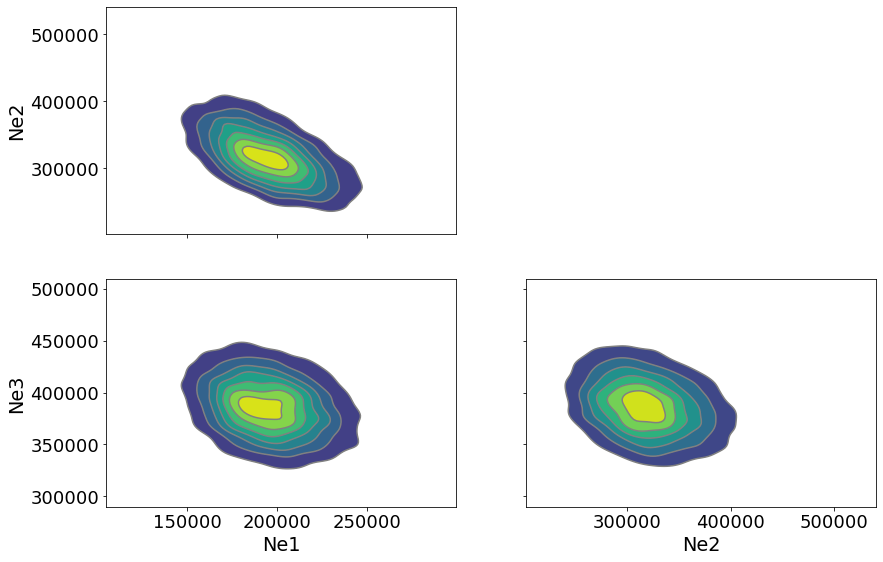

In [134]:
arviz.plot_pair(
    adata,
    var_names=['Ne1', 'Ne2', 'Ne3'],
    kind='kde',
    divergences=True,
    textsize=18,
);

In [109]:
arviz.summary(adata)

arviz - WARNING - Shape validation failed: input_shape: (1, 9000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Ne1,195045.438,23997.079,149815.521,239397.125,436.962,309.009,3010.0,5061.0,NaN
Ne2,319625.780,41007.975,242063.441,394379.248,879.748,626.182,2209.0,3401.0,NaN
Ne3,385773.769,28660.686,334654.328,442213.922,479.086,339.783,3596.0,5195.0,NaN
loglik,332458.216,1.244,332456.658,332460.475,0.018,0.013,5151.0,6161.0,NaN


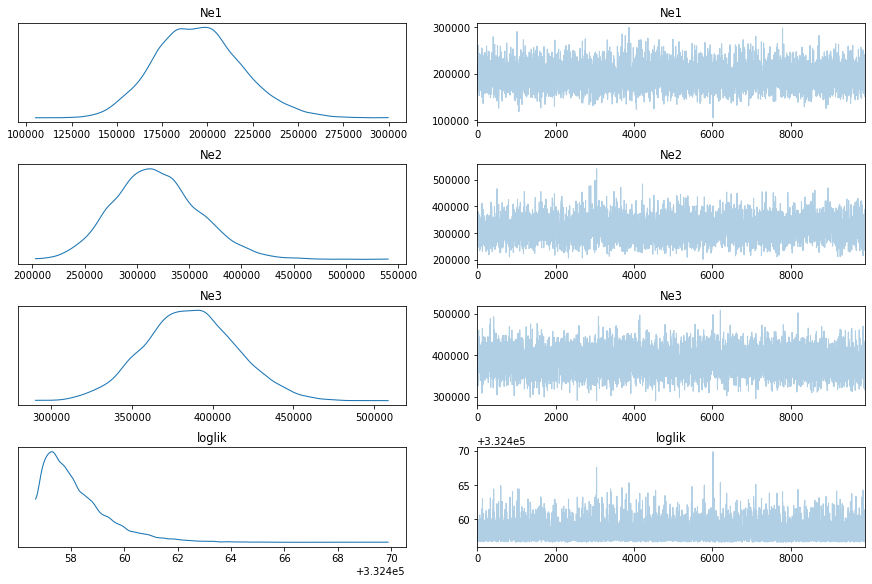

In [148]:
arviz.plot_trace(adata);

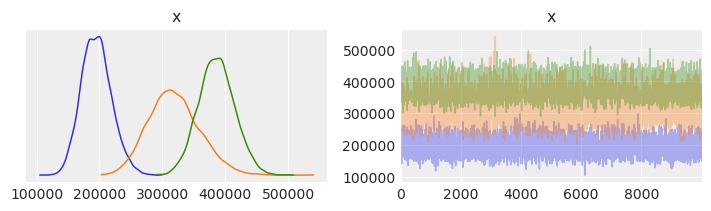

In [156]:
arviz.plot_trace(np.expand_dims(arr[:, :3], 0), figsize=(7, 2));

### 50% credible interval

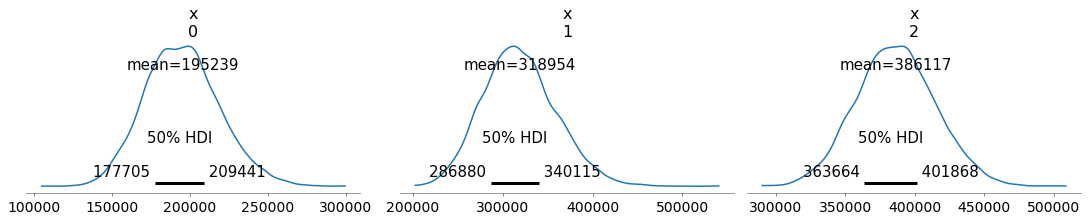

In [142]:
arviz.plot_posterior(np.expand_dims(arr[0:, :3], 0), figsize=(15,3), hdi_prob=0.5);

### 95% credible interval

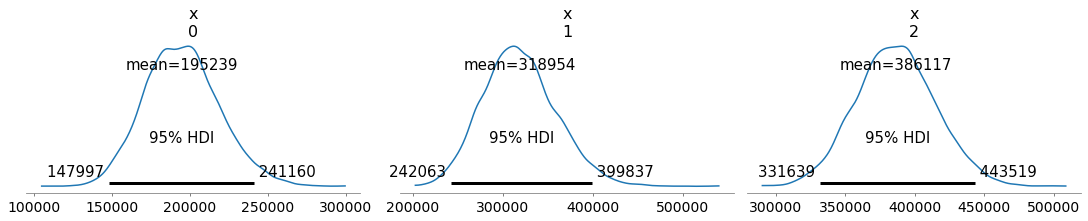

In [139]:
arviz.plot_posterior(np.expand_dims(arr[0:, :3], 0), figsize=(15,3), hdi_prob=0.95);

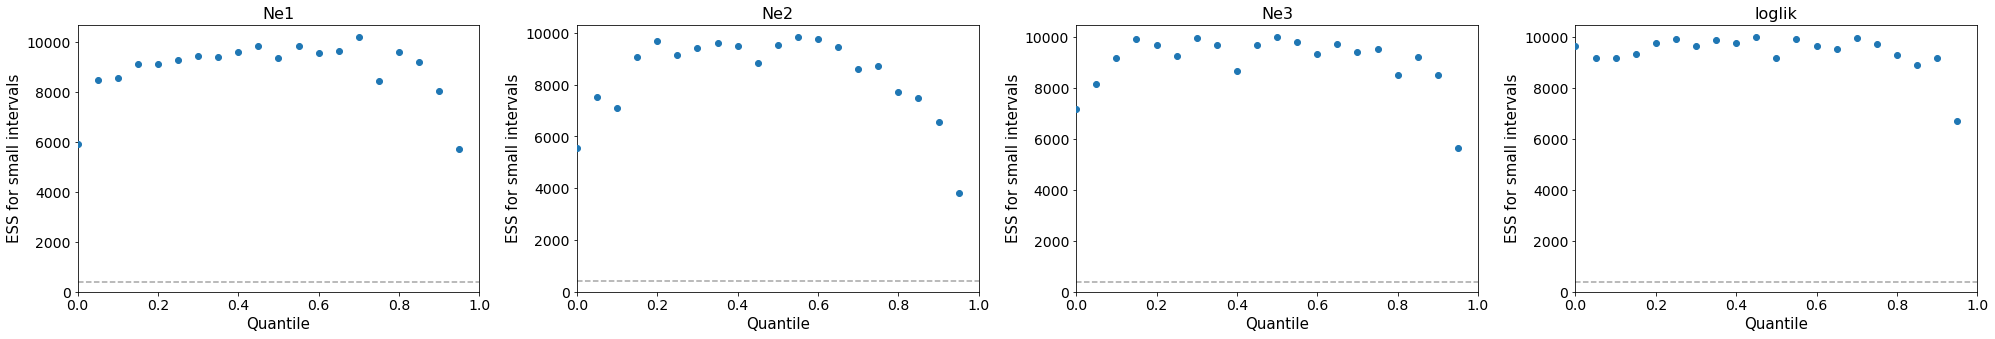

In [145]:
arviz.plot_ess(adata);